In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
from sklearn.preprocessing import OneHotEncoder as oe

In [25]:
data = pd.read_csv("Dataset.csv")

In [26]:
l = data['Used Date'][0] 
temp = re.findall(r'\d+', l) 
res = np.array(list(map(int, temp)))    

for i in range(1,data.shape[0]):
    l = data['Used Date'][i] 
    temp = re.findall(r'\d+', l) 
    a = np.array(list(map(int, temp)))
    res = np.concatenate([res,a] , axis = 0) 
r = np.reshape(res,(-1,3))
r.shape
d = pd.DataFrame(r)
d = d.rename(columns = {0:'Date',1:'Month',2:'Year'})
data = pd.concat([data,d],axis = 1)
print(data)

        Used Date From   To   Airline Scheduled Departure  SDEP Departure  \
0      31-01-2020  DEL  HYD  Air Asia                6:05   605      6:04   
1      31-01-2020  DEL  HYD    Indigo                4:50   450      4:36   
2      30-01-2020  DEL  HYD  Air Asia                6:05   605      5:54   
3      30-01-2020  DEL  HYD  Air Asia               17:40  1740     17:40   
4      30-01-2020  DEL  HYD  Air Asia               19:50  1950     19:54   
...           ...  ...  ...       ...                 ...   ...       ...   
10713  24-01-2019  CCU  DEL  SpiceJet               18:30  1830     18:30   
10714  23-01-2019  CCU  DEL  SpiceJet               18:30  1830     18:30   
10715  22-01-2019  CCU  DEL  SpiceJet               18:30  1830     18:38   
10716    9/1/2019  DEL  HYD  Spicejet               22:05  2205      0:40   
10717    2/1/2019  BOM  DEL   Vistara                1:10   110       130   

        DEP Scheduled Arrival  SARR  ... weather__hourly__visibility  \
0  

In [5]:
data = data.drop(['Used Date','Unnamed: 29','Unnamed: 30','Unnamed: 31'],axis = 1)

In [6]:
data = pd.get_dummies(data, columns = ['From','To','Airline'])
data = data.drop(['From_BLR','To_BOM','Airline_Air Asia'],axis = 1)

In [7]:
data = data.drop(7).reset_index(drop = True)

In [9]:
l1 = data.index[data['Arrival'] == '-1'].tolist()
l2 = data.index[data['Scheduled Arrival'] == '-1'].tolist()

data = data.drop(l1).reset_index(drop = True)
data = data.drop(l2).reset_index(drop = True)

In [10]:
data = data.drop(['SDEP','Departure','DEP','Scheduled Departure'],axis = 1)
data = data.drop('Departure Delay',axis = 1)

In [11]:
for i in range(data.shape[0]):
    if data['ARR'][i] - math.floor(data['ARR'][i]/100)*100 >= 30:
        data['ARR'][i] = math.ceil(data['ARR'][i]/100)
    else:
        data['ARR'][i] = math.floor(data['ARR'][i]/100)

C:\Users\karti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\karti\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data = data.drop(['Category'],axis = 1)

In [20]:
pd.get_dummies(data, columns = ['weather__hourly__weatherDesc__value'])

ce_bin = ce.BinaryEncoder(cols = ['weather__hourly__weatherDesc__value'])
ce_bin.fit(data,data['Arrival Delay'])

d = ce_bin.transform(data)

data = d

In [ ]:
from datetime import datetime
d = pd.DataFrame(np.zeros((data.shape[0],2)))
# arr_t1 = datetime.strptime(data['Arrival'][0],'%H:%M')
# arr_t2 = datetime.strptime(data['Scheduled Arrival'][0],'%H:%M')
# diff = arr_t1 - arr_t2   
# diff = str(diff)
# d.append(diff)
# print(type(diff))
print(d)
for i in range(data.shape[0]):
    arr_t1 = datetime.strptime(data['Arrival'][i],'%H:%M')
    arr_t2 = datetime.strptime(data['Scheduled Arrival'][i],'%H:%M')
    if arr_t1 >= arr_t2:
        dif = str(arr_t1 - arr_t2)
        print(arr_t1,arr_t2)
        print(i,dif)
        print('\n')
        d[0][i] = dif
    if arr_t1 < arr_t2:
        dif = str(arr_t2 - arr_t1)
        print(arr_t1,arr_t2)
        print(i,dif)
        print('\n')
        d[0][i] = dif
        d[1][i] = 1
        
    


In [122]:
for i in range(data.shape[0]):
    temp = re.findall(r'\d+', d[0][i]) 
    res = np.array(list(map(int, temp))).tolist()
    mins = res[0]*60 + res[1]
    if d[1][i] == 0:
        data['Arrival Delay'][i] = mins
    if d[1][i] == -1:
        data['Arrival Delay'][i] = -mins
    


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
Out = data.index[data['Arrival Delay'] > 300].tolist()
data = data.drop(Out).reset_index(drop = True)

data = data.drop(['Scheduled Arrival','Arrival'], axis = 1)

In [124]:
data = data.drop(['SARR'],axis = 1)

In [125]:
data_noweather = data.drop(['weather__hourly__windspeedKmph',
       'weather__hourly__weatherDesc__value_0',
       'weather__hourly__weatherDesc__value_1',
       'weather__hourly__weatherDesc__value_2',
       'weather__hourly__weatherDesc__value_3',
       'weather__hourly__weatherDesc__value_4',
       'weather__hourly__weatherDesc__value_5', 'weather__hourly__precipMM',
       'weather__hourly__humidity', 'weather__hourly__visibility',
       'weather__hourly__pressure', 'weather__hourly__cloudcover'], axis = 1)

In [126]:
ser = pd.DataFrame(np.zeros((data.shape[0],1)),columns = {"Holiday"})

data = pd.concat([data,ser],axis = 1)

Holidays = ["15-01-2019","26-01-2019","21-02-2019","10-03-2019","06-04-2019","25-05-2019","15-08-2019","22-08-2019","02-10-2019","25-10-2019","24-10-2019","14-11-2019","25-12-2019","26-01-2020"]      

for i in range(data.shape[0]):
    for j in Holidays:
        temp = re.findall(r'\d+', j) 
        res = np.array(list(map(int, temp))).tolist()
        if data['Date'][i] == res[0] and data['Month'][i] == res[1] and data['Year'][i] == res[2]:
            data['Holiday'][i] = 1
    

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [203]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(data.drop('Arrival Delay', axis = 1),data['Arrival Delay'], test_size = 0.2, random_state = 2)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8394, 22)
(2099, 22)
(8394,)
(2099,)


In [175]:
from sklearn.ensemble import RandomForestClassifier


xgb = RandomForestClassifier(n_estimators = 100,min_samples_split = 6,max_features = 20,n_jobs = -1,random_state = 1)

xgb.fit(X_train,y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print(r2_score(y_pred_train,y_train))
print(r2_score(y_pred_test,y_test))

0.7271086567364917
0.25733963071454435


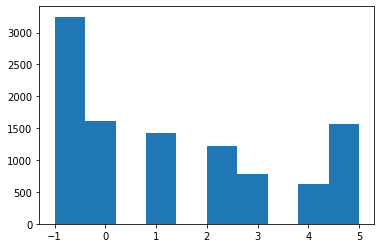

In [176]:
plt.hist(data['Arrival Delay'])
plt.show()

In [131]:
xgb.feature_importances_.argmin()

1

In [132]:
data = data.drop(['Status'],axis = 1)
data = data.drop(['weather__hourly__windspeedKmph'],axis = 1)

In [133]:
xgb.feature_importances_

array([2.90332549e-01, 0.00000000e+00, 5.73420786e-02, 4.00014741e-02,
       1.65682100e-02, 2.52535293e-02, 5.15871815e-02, 1.54577741e-02,
       6.10812457e-02, 0.00000000e+00, 1.20733076e-04, 3.04834402e-03,
       3.14227407e-03, 2.03394525e-03, 3.33412178e-03, 1.13989202e-02,
       8.81368713e-02, 6.90119003e-03, 5.44773010e-02, 6.11584568e-02,
       9.91427475e-02, 2.06433623e-02, 6.79471524e-03, 4.22789491e-03,
       7.03168766e-03, 1.31294534e-02, 1.06445112e-02, 1.70437490e-02,
       5.94816914e-04, 9.86531347e-03, 6.61259283e-03, 1.07070241e-03,
       9.64863576e-04, 6.04356799e-03, 4.81382172e-03])

In [149]:
for i in range(data.shape[0]):
    if data['Arrival Delay'][i] < 0 :
        data['Arrival Delay'][i] = -1
    if data['Arrival Delay'][i] > 0 and data['Arrival Delay'][i] < 10:
        data['Arrival Delay'][i] = 1
    if data['Arrival Delay'][i] >= 10 and data['Arrival Delay'][i] < 20:
        data['Arrival Delay'][i] = 2
    if data['Arrival Delay'][i] >= 20 and data['Arrival Delay'][i] < 30:
        data['Arrival Delay'][i] = 3
    if data['Arrival Delay'][i] >= 30 and data['Arrival Delay'][i] < 40:
        data['Arrival Delay'][i] = 4
    if data['Arrival Delay'][i] >= 40: 
        data['Arrival Delay'][i] = 5    

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [150]:
data['Arrival Delay'].value_counts()

-1    3249
 0    1613
 5    1571
 1    1431
 2    1223
 3     782
 4     624
Name: Arrival Delay, dtype: int64

In [151]:
def loss_func(y_true,y_pred):
    loss = 0
    for i in range(y_true.size):
        diff = abs(y_true[i] - y_pred[i])
        loss += diff
    return loss
            

In [178]:
X_train

,ARR,Status,Distance,Passenger Load Factor,Airline Rating,Airport Rating,Market Share,OTP Index,Date,Month,...,From_CCU,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara
5489,23,1,1736,90.1,0.7,0.90,47.5,81.1,4,12,...,0,0,1,0,0,0,1,0,0,0
9969,3,1,1736,90.0,0.4,0.90,16.3,76.8,21,10,...,0,0,1,0,0,0,0,0,1,0
2818,23,1,1312,80.0,0.5,0.86,11.9,64.2,25,12,...,1,0,1,0,1,0,0,0,0,0
2541,23,1,1244,81.1,0.8,0.88,6.1,82.9,28,12,...,0,1,0,1,0,0,0,0,0,1
4079,10,1,1312,90.1,0.7,0.86,47.5,81.1,15,12,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,22,1,1736,89.0,0.7,0.90,47.5,81.1,23,1,...,0,0,1,0,0,0,1,0,0,0
2514,7,1,848,92.7,0.4,0.90,16.5,76.8,28,12,...,0,0,0,0,0,0,0,0,1,0
6637,6,1,848,84.9,0.7,0.90,47.5,81.1,25,11,...,0,0,0,0,0,0,1,0,0,0
2575,0,1,1736,80.0,0.5,0.90,11.9,64.2,27,12,...,0,0,1,0,1,0,0,0,0,0


In [205]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
xgb = xgboost.XGBClassifier(n_estimators = 100,max_depth = 5, learning_rate = 0.1,booster = "gbtree",n_jobs = -1,gamma = 0.1,reg_alpha = 0.1, reg_lambda = 0.1,random_state = 1)
dist = {"n_estimators" : np.arange(100,200), "max_depth" : np.arange(2,10), "learning_rate" : np.linspace(0.1,1,10),"gamma" : np.linspace(0.1,1,10),"reg_alpha" : np.linspace(0.1,1,10), "reg_lambda" :  np.linspace(0.1,1,10)}
RCV = RandomizedSearchCV(xgb,dist,random_state = 2,n_iter = 100)
ran_fit = RCV.fit(X_train,y_train)
# from sklearn.metrics import accuracy_score

# xgb.fit(X_train,y_train)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7064569930903026
0.5026202953787517


In [206]:
print(ran_fit.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.9,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=139, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0.7000000000000001, reg_lambda=0.8, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)


In [214]:
xgb = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.0,
              learning_rate=0.30000000000000004, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=144, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0.7000000000000001, reg_lambda=0.7000000000000001,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              verbosity=1)
xgb.fit(X_train,y_train)
print(accuracy_score(xgb.predict(X_train),y_train))
print(accuracy_score(xgb.predict(X_test),y_test))

0.7928282106266381
0.49261553120533585


In [215]:
xgb = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.9,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=139, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0.7000000000000001, reg_lambda=0.8, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)
xgb.fit(X_train,y_train)
print(accuracy_score(xgb.predict(X_train),y_train))
print(accuracy_score(xgb.predict(X_test),y_test))

0.7840123898022396
0.4916626965221534


In [216]:
np.where(xgb.feature_importances_ == 0)

(array([ 7, 22, 25, 27, 28, 31], dtype=int64),)